# E91 Protocol
Oleksandr Yasinskyi 150570

In [20]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

import math
import random

In [21]:
backend = Aer.get_backend('qasm_simulator')

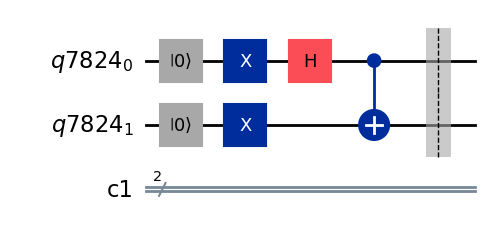

In [22]:
n0 = 2  # Number of qubits and bits
q0 = QuantumRegister(n0)  # Quantum register
c0 = ClassicalRegister(n0)  # Classical register

circuit0 = QuantumCircuit(q0, c0)
circuit0.reset([q0[0], q0[1]])

circuit0.x(q0[0])
circuit0.x(q0[1])
circuit0.h(q0[0])
circuit0.cx(q0[0], q0[1])
circuit0.barrier()
# Sketch of a quantum circuit
circuit0.draw(output='mpl', style="iqp")

# Measurement circuits

## Alice

### X basis

In [23]:
measureA1 = QuantumCircuit(q0, c0)

measureA1.h(q0[0])

measureA1.measure(q0[0], c0[0])

### W basis

In [24]:
measureA2 = QuantumCircuit(q0, c0)

measureA2.s(q0[0])
measureA2.h(q0[0])
measureA2.t(q0[0])
measureA2.h(q0[0])

measureA2.measure(q0[0], c0[0])

### Standard Z basis

In [25]:
measureA3 = QuantumCircuit(q0, c0)

measureA3.measure(q0[0], c0[0])

## Bob

### W basis

In [26]:
measureB1 = QuantumCircuit(q0, c0)

measureB1.s(q0[1])
measureB1.h(q0[1])
measureB1.t(q0[1])
measureB1.h(q0[1])

measureB1.measure(q0[1], c0[1])

### Z basis

In [27]:
measureB2 = QuantumCircuit(q0, c0)

measureB2.measure(q0[1], c0[1])

### V basis

In [28]:
measureB3 = QuantumCircuit(q0, c0)

measureB3.s(q0[1])
measureB3.h(q0[1])
measureB3.tdg(q0[1])
measureB3.h(q0[1])

measureB3.measure(q0[1], c0[1])

# Measurements

In [29]:
aliceMeasurements = [measureA1, measureA2, measureA3]
bobMeasurements = [measureB1, measureB2, measureB3]

In [30]:
n = 1024

alice = [random.randint(1, 3) for i in range(n)]
bob = [random.randint(1, 3) for i in range(n)]

In [31]:
measurement_type = dict()
for i in [1, 3]:
    for j in [1, 3]:
        measurement_type[(i, j)] = dict()
        measurement_type[(i, j)][(1, 1)] = 0
        measurement_type[(i, j)][(1, -1)] = 0
        measurement_type[(i, j)][(-1, 1)] = 0
        measurement_type[(i, j)][(-1, -1)] = 0

In [32]:
bit = []
for a, b in zip(alice, bob):
    c = circuit0.compose(aliceMeasurements[a - 1])
    c = c.compose(bobMeasurements[b - 1])

    job_sim0 = execute(c, backend, shots=1)
    sim_result0 = job_sim0.result()
    result = sim_result0.get_counts(circuit0)

    yA = int(list(result.keys())[0][0])
    yB = int(list(result.keys())[0][1])
    bit.append([yA,yB])

In [33]:
aliceResults = []
bobResults = []
for i, (a, b) in enumerate(bit):
    if a == 0 and b == 0:
        aliceResults.append(-1)
        bobResults.append(-1)
    if a == 1 and b == 0:
        aliceResults.append(1)
        bobResults.append(-1)
    if a == 0 and b == 1:
        aliceResults.append(-1)
        bobResults.append(1)
    if a == 1 and b == 1:
        aliceResults.append(1)
        bobResults.append(1)
    if alice[i] != 2 and bob[i] != 2:
        measurement_type[(alice[i], bob[i])][(aliceResults[-1], bobResults[-1])] += 1

In [34]:
aliceKey = []
bobKey = []
for i in range(n):
    if alice[i] == 2 and bob[i] == 1 or alice[i] == 3 and bob[i] == 2:
        aliceKey.append(aliceResults[i])
        bobKey.append(-bobResults[i])

# Keys

## Alice

In [35]:
''.join(['a' if i==1 else 'b' for i in aliceKey])

'aaaabaabbaaabbaabaababbbaabbabbbbababbbbaabbbbbbbbbabbbababbbabbabbbabbbbababababababbaabbaabbbbbbbaaabababababaaaabbaabbabbbababaaaabaabbababababbbaaabbababbaabababaabbaaabaabaabbbbabbababaaabbabbabbbbaaabaaabaababbbbb'

## Bob

In [36]:
''.join(['a' if i==1 else 'b' for i in bobKey])

'aaaabaabbaaabbaabaababbbaabbabbbbababbbbaabbbbbbbbbabbbababbbabbabbbabbbbababababababbaabbaabbbbbbbaaabababababaaaabbaabbabbbababaaaabaabbababababbbaaabbababbaabababaabbaaabaabaabbbbabbababaaabbabbabbbbaaabaaabaababbbbb'

## Mismatches

In [37]:
print("Number of mismatches:", sum([1 if aliceKey[j] != bobKey[j] else 0 for j in range(len(aliceKey))]))

Number of mismatches: 0


# CHSH test

In [39]:
print('{0:16s} | {1:4s} | {2:12s} | {3:12s} | {4:12s} | {5:12s} | {6:25s}'.format("Measurement type",
                                                                                  "N_jk",
                                                                                  f"n_jk{(1, 1)}",
                                                                                  f"n_jk{(-1, 1)}",
                                                                                  f"n_jk{(1, -1)}",
                                                                                  f"n_jk{(-1, -1)}",
                                                                                  "Sum[p_jk(a, a') * (a * a')]"))
result = 0
for k, v in measurement_type.items():
    vv = (
            v[(1, 1)] / (v[(1, 1)] + v[(-1, 1)] + v[(1, -1)] + v[(-1, -1)]) -
            v[(1,-1)] / (v[(1,1)] + v[(-1,1)] + v[(1,-1)] + v[(-1,-1)]) -
            v[(-1,1)] / (v[(1,1)] + v[(-1,1)] + v[(1, -1)] + v[(-1,-1)]) +
            v[(-1,-1)] / (v[(1,1)] + v[(-1,1)] + v[(1,-1)] + v[(-1,-1)])
    )
    if k == (1,3):
        result -= vv
    else:
        result += vv
    print('{0:16s} | {1:4s} | {2:12s} | {3:12s} | {4:12s} | {5:12s} | {6:15.2f}'.format(f"a{k[0]}, b{k[1]}",
                                                                                        str(v[(1, 1)] + v[(-1, 1)] + v[(1, -1)] + v[(-1, -1)]),
                                                                                        f"{v[(1, 1)]}",
                                                                                        f"{v[(-1, 1)]}",
                                                                                        f"{v[(1, -1)]}",
                                                                                        f"{v[(-1, -1)]}",
                                                                                        vv))
print(f"CHSH correlation value: {result}")
print(f"CHSH correlation value assumption difference -2 * sqrt(2): {abs(result - (-2 * math.sqrt(2)))}")

Measurement type | N_jk | n_jk(1, 1)   | n_jk(-1, 1)  | n_jk(1, -1)  | n_jk(-1, -1) | Sum[p_jk(a, a') * (a * a')]
a1, b1           | 122  | 8            | 51           | 54           | 9            |           -0.72
a1, b3           | 144  | 68           | 12           | 10           | 54           |            0.69
a3, b1           | 100  | 6            | 38           | 49           | 7            |           -0.74
a3, b3           | 114  | 6            | 53           | 49           | 6            |           -0.79
CHSH correlation value: -2.9452296040648074
CHSH correlation value assumption difference -2 * sqrt(2): 0.11680247931861709
